### ✅ Text Classification using TF-IDF in Google Colab

### 📌 Objective:

# To classify SMS messages as "Spam" or "Ham" using TF-IDF vectorization and a machine learning classifier.

# 📌 Step 1: Import Required Libraries

In this step, we import the necessary Python libraries for:

- Data handling (`pandas`, `numpy`)
- Text processing (`nltk`, `string`)
- Machine Learning (`scikit-learn`)
- Visualization (`matplotlib`, `seaborn`, `wordcloud`)

We also suppress warnings and download NLTK stopwords for preprocessing.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# 📊 Step 3: Basic Data Exploration

We explore the dataset to understand:
- Total number of samples
- Class distribution (how many ham vs spam)
- Presence of any missing values

We also create a bar chart to visualize class imbalance (if any).


In [ ]:
# Load dataset directly from UCI or upload a CSV
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=["label", "message"])
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 🧹 Step 4: Text Preprocessing

Before vectorizing the text, we clean it by:
- Converting to lowercase
- Removing punctuation
- Removing stopwords (common words like "the", "is", "and")

This step ensures that the model focuses on **meaningful words**.


In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

df['cleaned'] = df['message'].apply(clean_text)
df[['message', 'cleaned']].head()


,message,cleaned
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


# 🔠 Step 5: TF-IDF Vectorization

We convert the cleaned text into numerical features using **TF-IDF (Term Frequency-Inverse Document Frequency)**.

TF-IDF:
- Highlights words that are frequent in a specific message but rare across others.
- Reduces the weight of common/unimportant words.

We limit the vocabulary to the top 3000 most informative words using `TfidfVectorizer`.


In [ ]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['cleaned']).toarray()
y = df['label'].map({'ham': 0, 'spam': 1}).values

X.shape, y.shape


((5572, 3000), (5572,))

# 🧪 Step 6: Train-Test Split and Model Training

We:
1. Split the data into training and test sets (75% train, 25% test).
2. Train a **Logistic Regression** classifier on the training data.
3. Predict labels on the test set.

Logistic Regression is a simple yet powerful baseline for binary classification.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# 📈 Step 7: Model Evaluation

We evaluate the model using:
- Classification report (precision, recall, f1-score)
- Confusion matrix (TP, TN, FP, FN)

This helps us understand the model's performance on spam vs ham classification.


Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1207
           1       0.99      0.74      0.85       186

    accuracy                           0.96      1393
   macro avg       0.98      0.87      0.91      1393
weighted avg       0.97      0.96      0.96      1393



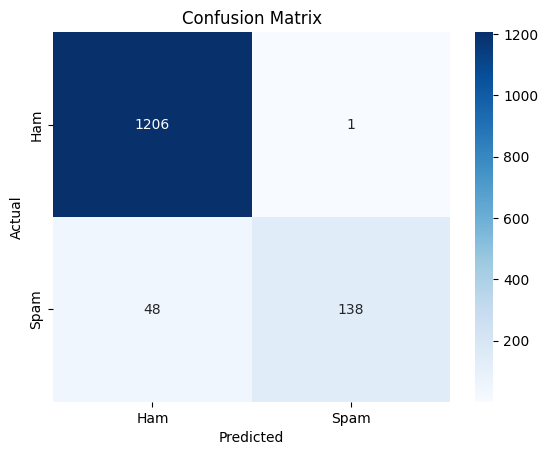

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# ☁️ Step 8: Word Clouds for Spam and Ham

We visualize the most common words in:
- **Spam messages**
- **Ham messages**

Using `WordCloud`, we generate two word clouds to show which words are more frequent in each category. This helps in understanding word patterns and differences between spam and non-spam content.


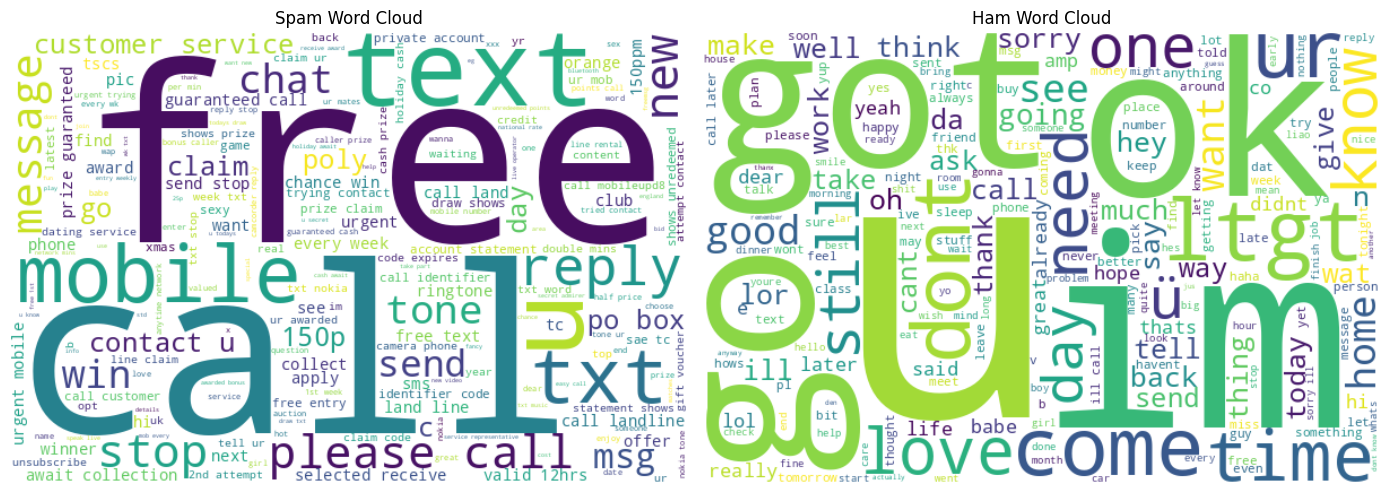

In [ ]:
spam_words = ' '.join(df[df['label']=='spam']['cleaned'])
ham_words = ' '.join(df[df['label']=='ham']['cleaned'])

spam_wc = WordCloud(width=600, height=400, background_color='white').generate(spam_words)
ham_wc = WordCloud(width=600, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()


## 📘 Bag of Words (BoW) + Naive Bayes

Text ko word counts (BoW) me convert kiya jata hai.
Classifier: Multinomial Naive Bayes (fast & effective).
Pros: Simple, fast, good for small datasets.
Cons: Ignores context & word order.

Accuracy: 0.9806173725771715

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1207
           1       1.00      0.85      0.92       186

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



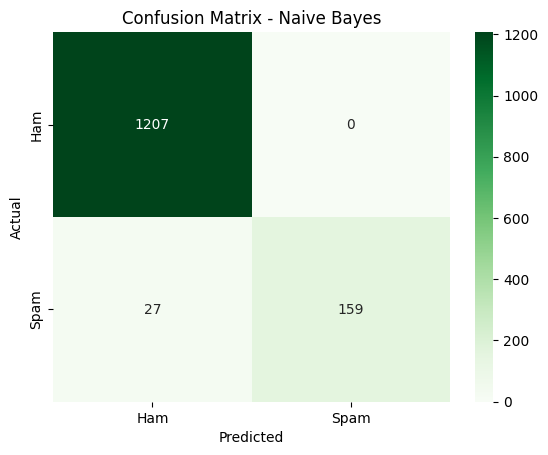

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_nb = nb_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Greens', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


## 📘 Deep Learning (LSTM + Embeddings)

Text ko dense embeddings me convert karke LSTM model train hota hai.

LSTM context aur word order samajhta hai.

Pros: Better accuracy, learns patterns & context.

Cons: Slower, needs more data & compute.

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
# Encode labels (ham=0, spam=1)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

model = Sequential([
    Embedding(input_dim=5000, output_dim=64),
    LSTM(64),
    Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'],
    test_size=0.2, random_state=42, stratify=df['label_num']
)

# Tokenization
max_words = 5000   # vocab size
max_len = 100      # max sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding (convert to same length)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post")


In [ ]:
# Train the model
history = model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_pad, y_test),
    verbose=1
)

# Evaluate on test set
loss, acc = model.evaluate(X_test_pad, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {acc:.4f}")


Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.8072 - loss: 0.4669 - val_accuracy: 0.8664 - val_loss: 0.3948
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.8692 - loss: 0.3887 - val_accuracy: 0.8664 - val_loss: 0.3950
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.8596 - loss: 0.4062 - val_accuracy: 0.8664 - val_loss: 0.3982
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.8726 - loss: 0.3822 - val_accuracy: 0.8664 - val_loss: 0.3950
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.8724 - loss: 0.3833 - val_accuracy: 0.8664 - val_loss: 0.3940

✅ Test Accuracy: 0.8664


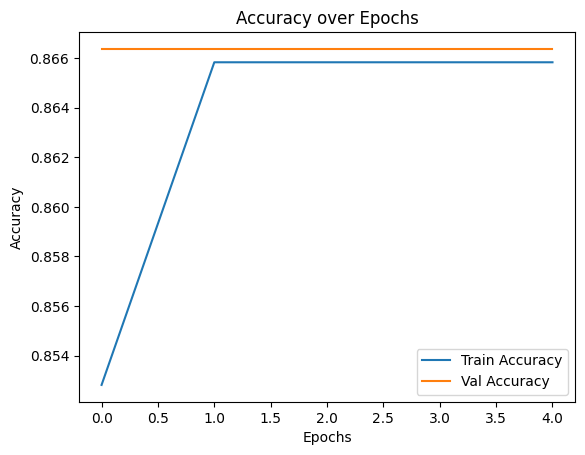

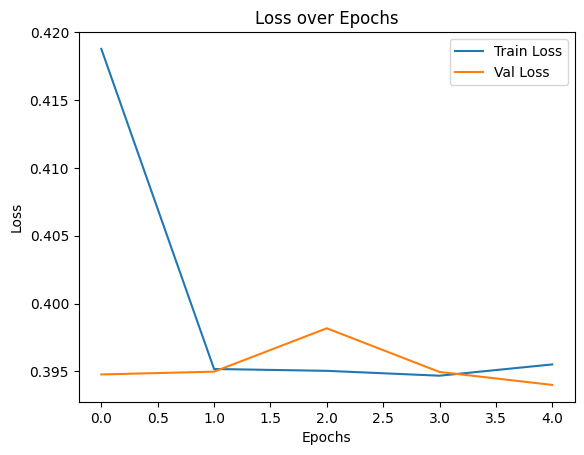

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over Epochs")
plt.show()


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

📊 Classification Report:

              precision    recall  f1-score   support

         Ham       0.87      1.00      0.93       966
        Spam       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


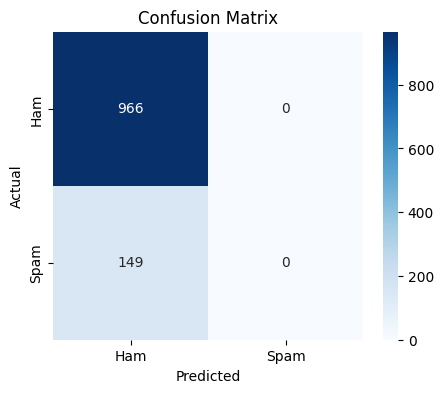

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict (probabilities → binary labels)
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32").flatten()

# Classification Report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
